# 1. Extraction de Keywords

## Imports

In [4]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [5]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général"])
ignored

{'conseil communal', 'conseil général'}

In [6]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [7]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [8]:
# Imprimer le nombre de fichiers identifiés
len(files)

2828

In [32]:
# Les dix premiers fichiers
files[1219:1243]

['Bxl_1928_Tome_II1_Part_1.txt',
 'Bxl_1928_Tome_II1_Part_10.txt',
 'Bxl_1928_Tome_II1_Part_11.txt',
 'Bxl_1928_Tome_II1_Part_12.txt',
 'Bxl_1928_Tome_II1_Part_2.txt',
 'Bxl_1928_Tome_II1_Part_3.txt',
 'Bxl_1928_Tome_II1_Part_4.txt',
 'Bxl_1928_Tome_II1_Part_5.txt',
 'Bxl_1928_Tome_II1_Part_6.txt',
 'Bxl_1928_Tome_II1_Part_7.txt',
 'Bxl_1928_Tome_II1_Part_8.txt',
 'Bxl_1928_Tome_II1_Part_9.txt',
 'Bxl_1928_Tome_II2_Part_1.txt',
 'Bxl_1928_Tome_II2_Part_10.txt',
 'Bxl_1928_Tome_II2_Part_11.txt',
 'Bxl_1928_Tome_II2_Part_12.txt',
 'Bxl_1928_Tome_II2_Part_2.txt',
 'Bxl_1928_Tome_II2_Part_3.txt',
 'Bxl_1928_Tome_II2_Part_4.txt',
 'Bxl_1928_Tome_II2_Part_5.txt',
 'Bxl_1928_Tome_II2_Part_6.txt',
 'Bxl_1928_Tome_II2_Part_7.txt',
 'Bxl_1928_Tome_II2_Part_8.txt',
 'Bxl_1928_Tome_II2_Part_9.txt']

In [33]:
# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

2677

In [35]:
# Choisir un fichier
this_file = bxl_files[1219]
this_file

'Bxl_1928_Tome_II1_Part_1.txt'

In [36]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"\x0cV I L L E\n\nD E\n\nB R U X E L L E S\n\nBULLETIN COMMUNAL\nA N N É E\n\nTOME\n\n1928\n\nII\n\nBRUXELLES\nIMPRIMERIE\n12,\n\nrue\n\nE. G U Y O T ,\nPachéco,\n\n1928\n\n12\n\nS. A .\n\n\x0c\x0cInauguration du monument Buls-DeMot.\n\nLe monument élevé par l a Ville de Bruxelles, avenue\nLouise, à l a mémoire des anciens Bourgmestres Charles\nBuis et Emile De Mot, a été inauguré le samedi 30 juin, à\n2 h. 112.\nLe R o i , en ce moment, en voyage officiel au Congo, s'était»\nfait représenter à l a cérémonie par l ' u n de ses Aides de camp,"

In [37]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [38]:
keywords

[('Juillet', 0.0006913840773519521),
 ('Conseil communal', 0.0007358157824811194),
 ('Conseil', 0.001467435003841394),
 ('Collège', 0.001621605838415196),
 ('Taxe', 0.0016833111424255597),
 ('Bourgmestre', 0.0017865065363521988),
 ("l'Echevin Wauwermans", 0.003039753894961712),
 ('DATE DEPENSE DÉPENSES', 0.003773873802896411),
 ('membres', 0.004733869497561158),
 ('dépenses', 0.0047651122832518145),
 ('BRUXELLES', 0.004925962639298501),
 ('Wauwermans', 0.005064623960988505),
 ('COMMUNAL', 0.0050681834361381035),
 ('Brunfaut', 0.005075049019425796),
 ('Frais', 0.005544458809678353),
 ('membres répondent', 0.0055651608469097),
 ('membres répondent oui', 0.005848357755176363),
 ('vote', 0.006000383748378628),
 ('propriétés', 0.006437663494605058),
 ('Mot', 0.006706855405528729),
 ('Ville', 0.006718872836493548),
 ('membres prennent part', 0.006933396288298034),
 ('Verhaeghe-de Naeyer', 0.006965602344090129),
 ('francs', 0.007145794939912241),
 ("l'Echevin Jacqmain", 0.007441659336053527),

In [39]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

["l'Echevin Wauwermans",
 'membres répondent',
 'Verhaeghe-de Naeyer',
 "l'Echevin Jacqmain",
 'Charles Buis',
 'DEPENSE DÉPENSES',
 'crédits supplémentaires']

## Faire la même opération sur tous les documents

In [40]:
for f in sorted(bxl_files)[1219:1243]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1928_Tome_II1_Part_1.txt mentions these keywords: l'Echevin Wauwermans, membres répondent, Verhaeghe-de Naeyer, l'Echevin Jacqmain, Charles Buis, DEPENSE DÉPENSES, crédits supplémentaires...
Bxl_1928_Tome_II1_Part_10.txt mentions these keywords: l'année scolaire, COMITÉ ADMINISTRATIF, cours l'année, nombre d'élèves, Départs d'élèves, D'ÉLÈVES HABITANT, Fréquentation moyenne, ECOLE PROFESSIONNELLE, COMMISSION ADMINISTRATIVE, COURS PROFESSIONNELS, anciens élèves, Tannée scolaire, élèves passent...
Bxl_1928_Tome_II1_Part_11.txt mentions these keywords: l'année scolaire, cours public, NOMBRE D'ÉLÈVES, Congo belge, Commission d'assistance, d'assistance publique, œuvres sociales, D'ÉLÈVES HABITANT...
Bxl_1928_Tome_II1_Part_12.txt mentions these keywords: voir Ecoles, L'affaire s'est, s'est terminée, Affaire terminée, voir Art, Ville s'est, transports funèbres, voir Enseignement, voir Affichage, recouvrement d'une...
Bxl_1928_Tome_II1_Part_2.txt mentions these keywords: REÇU RECETTES, REC

# 2. Nuage de mots

## Imports et stopwords

In [43]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "celui", "leurs", "déjà", "chaque", "etc", "parce que", "suite", "concerne", "ans", 
      "très", "toute", "mesdames", "année", "année", "rue", "rues", "bruxelles", "echevin", "service", "communal", "bourgmestre"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [76]:
# Choisir une année
year = 1928

In [77]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1928_Tome_II1_Part_1.txt',
 'Bxl_1928_Tome_II1_Part_10.txt',
 'Bxl_1928_Tome_II1_Part_11.txt',
 'Bxl_1928_Tome_II1_Part_12.txt',
 'Bxl_1928_Tome_II1_Part_2.txt',
 'Bxl_1928_Tome_II1_Part_3.txt',
 'Bxl_1928_Tome_II1_Part_4.txt',
 'Bxl_1928_Tome_II1_Part_5.txt',
 'Bxl_1928_Tome_II1_Part_6.txt',
 'Bxl_1928_Tome_II1_Part_7.txt',
 'Bxl_1928_Tome_II1_Part_8.txt',
 'Bxl_1928_Tome_II1_Part_9.txt',
 'Bxl_1928_Tome_II2_Part_1.txt',
 'Bxl_1928_Tome_II2_Part_10.txt',
 'Bxl_1928_Tome_II2_Part_11.txt',
 'Bxl_1928_Tome_II2_Part_12.txt',
 'Bxl_1928_Tome_II2_Part_2.txt',
 'Bxl_1928_Tome_II2_Part_3.txt',
 'Bxl_1928_Tome_II2_Part_4.txt',
 'Bxl_1928_Tome_II2_Part_5.txt',
 'Bxl_1928_Tome_II2_Part_6.txt',
 'Bxl_1928_Tome_II2_Part_7.txt',
 'Bxl_1928_Tome_II2_Part_8.txt',
 'Bxl_1928_Tome_II2_Part_9.txt']

In [78]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [79]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

24

In [80]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'\x0cV I L L E\n\nD E\n\nB R U X E L L E S\n\nBULLETIN COMMUNAL\nA N N É E\n\nTOME\n\n1928\n\nII\n\nBRUXELLES\nIMPRIMERIE\n12,\n\nrue\n\nE. G U Y O T ,\nPachéco,\n\n1928\n\n12\n\nS. A .\n\n\x0c\x0cInauguration du monument Buls-DeMot.\n\nLe mo'

In [81]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [82]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"\x0cV I L L E\n\nD E\n\nB R U X E L L E S\n\nBULLETIN COMMUNAL\nA N N É E\n\nTOME\n\n1928\n\nII\n\nBRUXELLES\nIMPRIMERIE\n12,\n\nrue\n\nE. G U Y O T ,\nPachéco,\n\n1928\n\n12\n\nS. A .\n\n\x0c\x0cInauguration du monument Buls-DeMot.\n\nLe monument élevé par l a Ville de Bruxelles, avenue\nLouise, à l a mémoire des anciens Bourgmestres Charles\nBuis et Emile De Mot, a été inauguré le samedi 30 juin, à\n2 h. 112.\nLe R o i , en ce moment, en voyage officiel au Congo, s'était»\nfait représenter à l a cérémonie par l ' u n de ses Aides de camp,"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [83]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{1928}.txt"
        output_path = f"{1928}_clean.txt"
    else:
        input_path = f"{folder}/{1928}.txt"
        output_path = f"{folder}/{1928}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [84]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1928_clean.txt!'

In [85]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin tome imprimerie pachéco inauguration monument buls demot monument élevé avenue louise mémoire anciens bourgmestres charles buis emile mot inauguré samedi juin moment voyage officiel congo représenter cérémonie aides camp lieutenant général lemercier invités reçus baron lemonnier coelst jacqmain meulebroeck pattou waucquez echevins brees secrétaire membres collège portaient uniforme côtés monument pris place famille mot famille buis personnes présentes trouvaient hymans ministre affaires'

## Nuage de mots

### Afficher les termes les plus fréquents

In [86]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('francs', 1859), ('personnel', 837), ('cours', 794), ('conseil', 785), ('frais', 675), ('travaux', 667), ('enfants', 658), ('école', 643), ('écoles', 616), ('recettes', 616)]


### Créer, stocker et afficher le nuage de mots

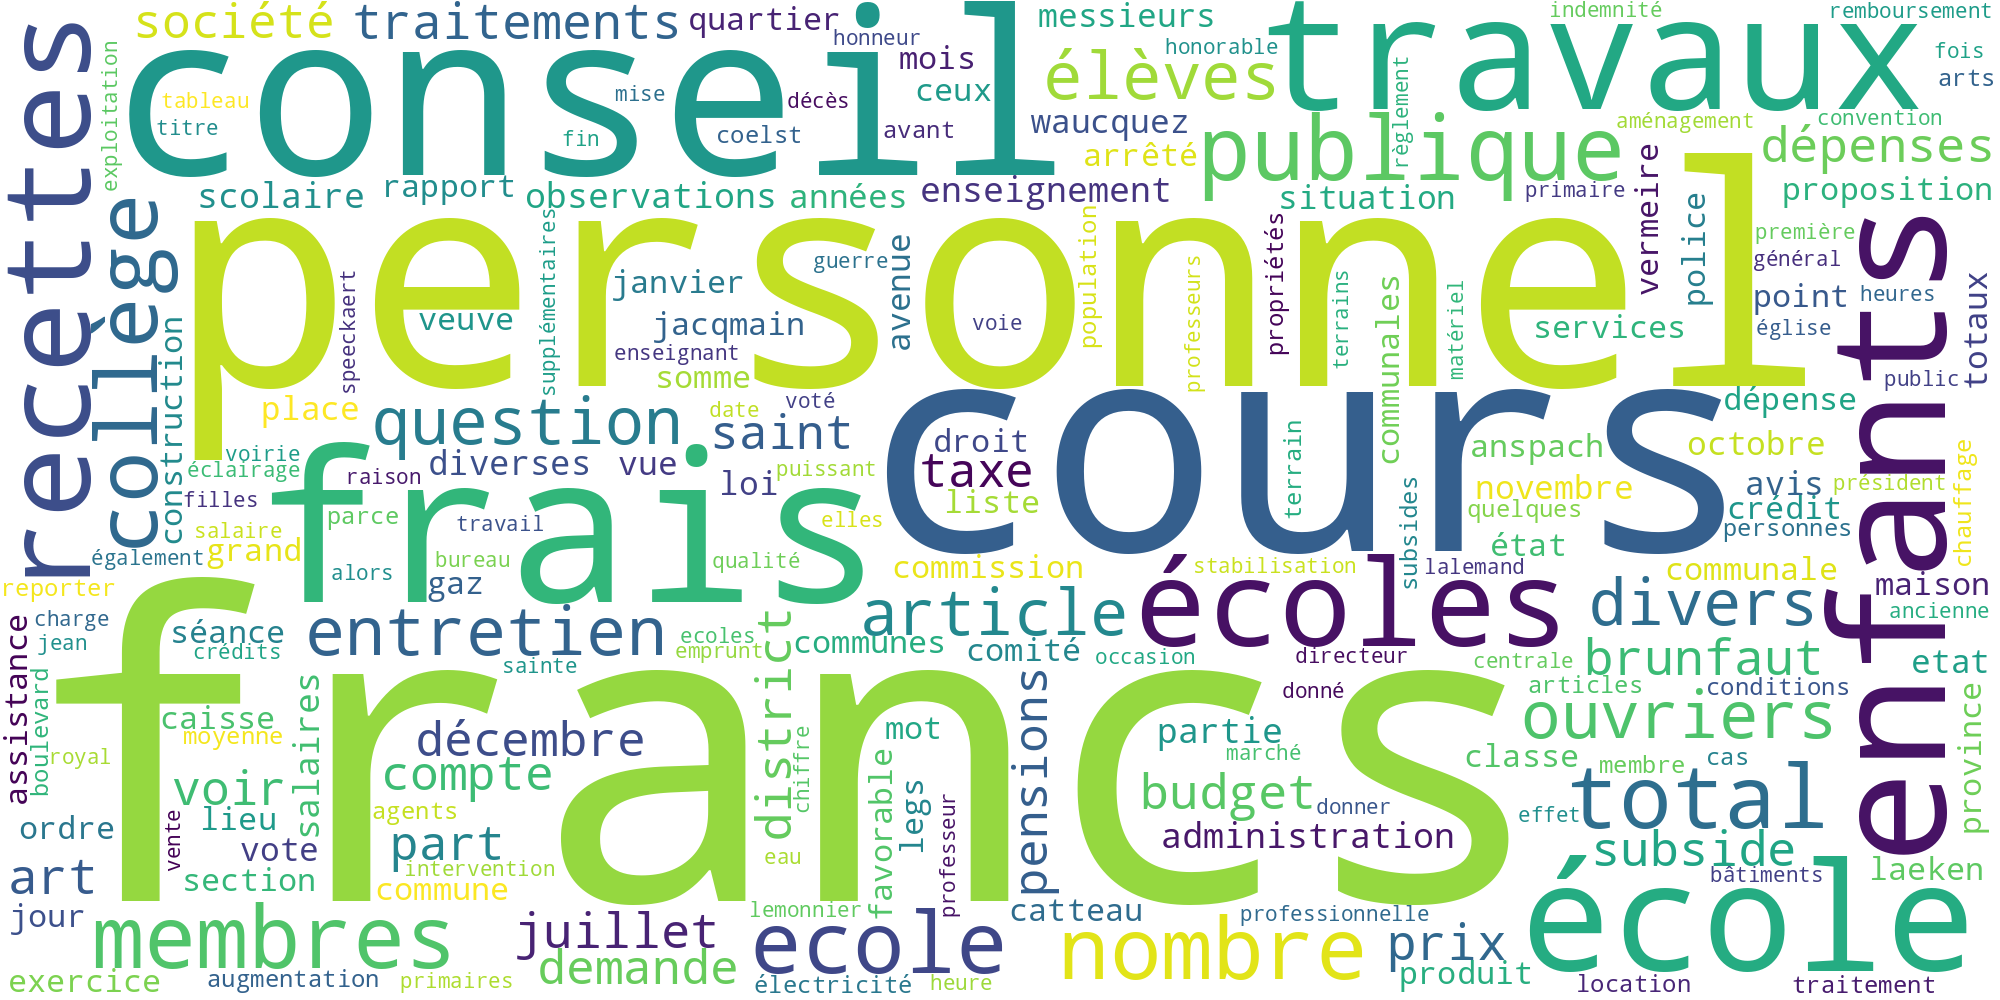

In [87]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{1928}.png"))
Image(filename=os.path.join(temp_path, f"{1928}.png"))